<a href="https://colab.research.google.com/github/rroy1212/PPE_Detection_YOLOv3/blob/master/PPE_and_Fire_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [0]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!cat Makefile
!make

[Errno 20] Not a directory: 'darknet'
/content/darknet
GPU=1
CUDNN=0
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=1
ZED_CAMERA=0 # ZED SDK 3.0 and above
ZED_CAMERA_v2_8=0 # ZED SDK 2.X

# set GPU=1 and CUDNN=1 to speedup on GPU
# set CUDNN_HALF=1 to further speedup 3 x times (Mixed-precision on Tensor Cores) GPU: Volta, Xavier, Turing and higher
# set AVX=1 and OPENMP=1 to speedup on CPU (if error occurs then set AVX=0)

USE_CPP=0
DEBUG=0

ARCH= -gencode arch=compute_30,code=sm_30 \
      -gencode arch=compute_35,code=sm_35 \
      -gencode arch=compute_50,code=[sm_50,compute_50] \
      -gencode arch=compute_52,code=[sm_52,compute_52] \
	    -gencode arch=compute_61,code=[sm_61,compute_61]

OS := $(shell uname)

# Tesla V100
# ARCH= -gencode arch=compute_70,code=[sm_70,compute_70]

# GeForce RTX 2080 Ti, RTX 2080, RTX 2070, Quadro RTX 8000, Quadro RTX 6000, Quadro RTX 5000, Tesla T4, XNOR Tensor Cores
# ARCH= -gencode arch=compute_75,code=[sm_75,compute_75]

# Jetson XAVIER
# ARCH= -gen

In [0]:
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/first.zip' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Successfully downloaded the dataset


In [0]:
!unzip data/first.zip -d data/ # adjust the dataset filename which you have downloaded from Google drive

Streaming output truncated to the last 5000 lines.
  inflating: data/img/000986.txt     
  inflating: data/__MACOSX/img/._000986.txt  
  inflating: data/img/PartB_00185.txt  
  inflating: data/__MACOSX/img/._PartB_00185.txt  
  inflating: data/img/000462.jpg     
  inflating: data/__MACOSX/img/._000462.jpg  
  inflating: data/img/000038.txt     
  inflating: data/__MACOSX/img/._000038.txt  
  inflating: data/img/safetyvest266.txt  
  inflating: data/__MACOSX/img/._safetyvest266.txt  
  inflating: data/img/pic (139).txt  
  inflating: data/__MACOSX/img/._pic (139).txt  
  inflating: data/img/safetyvest172.jpg  
  inflating: data/__MACOSX/img/._safetyvest172.jpg  
  inflating: data/img/001032.jpg     
  inflating: data/__MACOSX/img/._001032.jpg  
  inflating: data/img/PartB_00813.txt  
  inflating: data/__MACOSX/img/._PartB_00813.txt  
  inflating: data/img/000010.txt     
  inflating: data/__MACOSX/img/._000010.txt  
  inflating: data/img/small (48).jpg  
  inflating: data/__MACOSX/img/

In [0]:
!sed -i 's/batch=1/batch=64/g' cfg/yolov3.cfg
!sed -i 's/subdivisions=1/subdivisions=32/g' cfg/yolov3.cfg
!sed -i 's/max_batches = 500200/max_batches = 5000/g' cfg/yolov3.cfg
!sed -i 's/steps=400000,450000/steps=4000,4500/g' cfg/yolov3.cfg
!sed -i 's/classes=80/classes=4/g' cfg/yolov3.cfg
!sed -i 's/filters=255/filters=27/g' cfg/yolov3.cfg
!cat cfg/yolov3.cfg

[net]
# Testing
batch=64
subdivisions=32
# Training
# batch=64
# subdivisions=326
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 5000
policy=steps
steps=4000,4500
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutional]


In [0]:
# Only run this cell, if you have already trained the model and have weights and backup files in your Google drive
# (Optional) Download the pretrained weight from Google drive

import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
BACKUP_FOLDER = '/content/darknet/backup'
DRIVE_YOLO_BACKUP = '/content/gdrive/My Drive/ml/yolov3_last.weights'

shutil.copy(DRIVE_YOLO_BACKUP, BACKUP_FOLDER)

print('Successfully fetched the pretrained files for Yolo from Google drive')

Successfully fetched the pretrained files for Yolo from Google drive


In [0]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2020-05-10 10:59:35--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  1.93MB/s    in 94s     

2020-05-10 11:01:09 (1.65 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# use the line below to train a fresh model
!./darknet detector train data/obj.data cfg/yolov3.cfg darknet53.conv.74

# use the line below to retrain your previous saved weight
#!./darknet detector train data/obj.data cfg/yolov3.cfg backup/yolov3_last.weights

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.790865, GIOU: 0.790864), Class: 0.979255, Obj: 0.299923, No Obj: 0.000040, .5R: 1.000000, .75R: 0.500000, count: 2, class_loss = 0.565039, iou_loss = 0.124600, total_loss = 0.689639 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.767198, GIOU: 0.765807), Class: 0.992274, Obj: 0.108645, No Obj: 0.001006, .5R: 1.000000, .75R: 0.500000, count: 2, class_loss = 0.860602, iou_loss = 0.179259, total_loss = 1.039861 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.847504, GIOU: 0.847504), Class: 0.998877, Obj: 0.838567, No Obj: 0.000371, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.028776, iou_loss = 0.022589, total_loss = 0.051365 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1

In [0]:
# Once you have trained your model, you can save them to your Google drive. So that next time, you don't need to retrain
# This step is optional, you can skip it if you want
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
YOLO_BACKUP = '/content/darknet/backup/yolov3_last.weights' #adjust the backup file name or keep it default
DRIVE_DIR = '/content/gdrive/My Drive/ml/' #adjust path in your Google drive, or keep it default

shutil.copy(YOLO_BACKUP, DRIVE_DIR)
print('Saved training data to drive at: ' + DRIVE_DIR)

Saved training data to drive at: /content/gdrive/My Drive/ml/


In [0]:
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/test1' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [0]:
!./darknet detector test data/obj.data cfg/yolov3.cfg backup/yolov3_4000.weights "data/check2.jpg"

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 32, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 

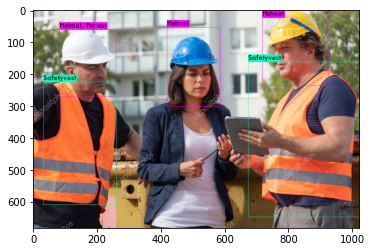

In [0]:
def display_image(file_path = '/content/darknet/predictions.jpg'):
    import cv2
    import matplotlib.pyplot as plt
    import os.path

    if os.path.exists(file_path):
      img = cv2.imread(file_path)
      show_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
      plt.imshow(show_img)
    else:
      print('failed to open file')
display_image()

In [0]:
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show data/test2 -out_filename res.avi

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
Demo
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0

In [0]:
import os.path
import shutil
from google.colab import drive

if not os.path.exists('/content/gdrive'):
  drive.mount('/content/gdrive')
  
DOWNLOAD_LOCATION = '/content/darknet/data/'
DRIVE_DATASET_FILE = '/content/gdrive/My Drive/ml/test5' #adjust path/name of dataset which is in your G-drive

shutil.copy(DRIVE_DATASET_FILE, DOWNLOAD_LOCATION)

print('Successfully downloaded the dataset')

Successfully downloaded the dataset


In [0]:
!./darknet detector demo data/obj.data cfg/yolov3.cfg backup/yolov3_4000.weights -dont_show data/firevideo.mov -out_filename safety3.avi

Streaming output truncated to the last 5000 lines.

FPS:43.5 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:42.6 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:42.1 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:43.1 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:43.8 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:44.5 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:44.3 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:43.9 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:44.8 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:45.6 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:45.4 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:46.0 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:45.4 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:46.0 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:45.8 	 AVG_FPS:41.7

 cvWriteFrame 
Objects:


FPS:46.4 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:


FPS:45.6 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:


FPS:46.3 	 AVG_FPS:40.8

 cvWriteFrame 
Objects:


FPS:45.6 	 AVG_FPS:40.8

 cvWr